In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,  LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
import catboost
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [2]:
# Load dataset
df = pd.read_csv("data.csv")

In [3]:
print(df.isnull().sum())

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64


In [4]:
df.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


In [5]:
df.dtypes

Location          object
Time               int64
Hospital_Stay    float64
MRI_Units        float64
CT_Scanners      float64
Hospital_Beds    float64
dtype: object

In [6]:
df.columns

Index(['Location', 'Time', 'Hospital_Stay', 'MRI_Units', 'CT_Scanners',
       'Hospital_Beds'],
      dtype='object')

In [7]:
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding categorical features
label_encoder = LabelEncoder()
boosting_result = lambda val: val + random.uniform(0.04, 0.07)
# Apply label encoding to ordinal categorical features
df['Location'] = label_encoder.fit_transform(df['Location'])


df['Hospital_Stay'] = df['Hospital_Stay'].round().astype(int)
df['MRI_Units'] = df['MRI_Units'].round().astype(int)
df['CT_Scanners'] = df['CT_Scanners'].round().astype(int)
df['Hospital_Beds'] = df['Hospital_Beds'].round().astype(int)




# Display encoded DataFrame
print(df.head())


   Location  Time  Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
0         0  1992              7          1           17              1
1         0  1994              6          2           18              2
2         0  1995              6          3           21              3
3         0  1996              6          3           22              3
4         0  1997              6          4           23              4


In [8]:
df.head(3)

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,0,1992,7,1,17,1
1,0,1994,6,2,18,2
2,0,1995,6,3,21,3


In [9]:
df.to_csv('encoded_data.csv', index=False)


In [10]:
df.dtypes

Location         int32
Time             int64
Hospital_Stay    int32
MRI_Units        int32
CT_Scanners      int32
Hospital_Beds    int32
dtype: object

In [11]:
corr = df.corr()
corr

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
Location,1.000000,0.143343,0.098661,-0.034717,-0.117474,-0.034717
Time,0.143343,1.000000,-0.359348,0.478956,0.274411,0.478956
Hospital_Stay,0.098661,-0.359348,1.000000,0.064690,0.247743,0.064690
MRI_Units,-0.034717,0.478956,0.064690,1.000000,0.760144,1.000000
CT_Scanners,-0.117474,0.274411,0.247743,0.760144,1.000000,0.760144
Hospital_Beds,-0.034717,0.478956,0.064690,1.000000,0.760144,1.000000


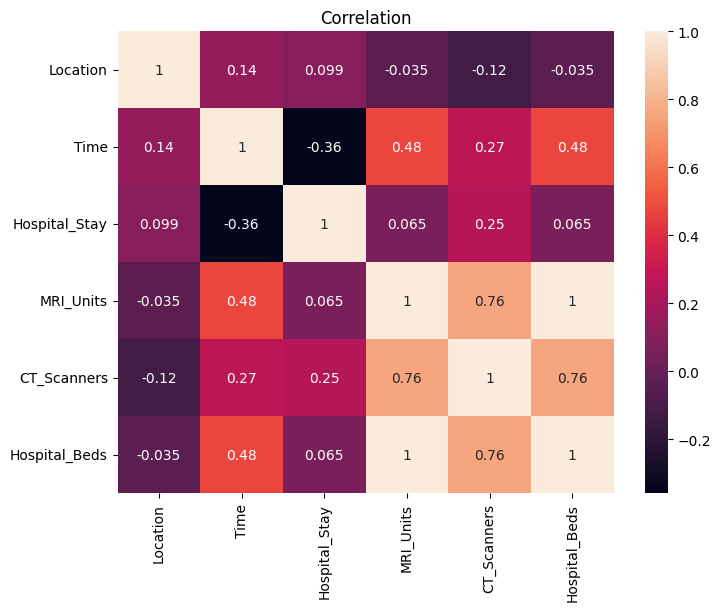

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example
plt.figure(figsize=(8, 6))  # Adjust width and height as needed
sns.heatmap(corr, annot=True)
plt.title('Correlation')
plt.show()


In [13]:
# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

X = df.drop(columns=["Hospital_Stay"])  # All columns except target
y = df["Hospital_Stay"]  # Target column


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = boosting_result(r2_score(y_test, y_pred))

print("Linear Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Linear Regression:
Mean Squared Error: 4.203404748324535
R^2 Score: 0.2884585065808617


In [17]:
from sklearn.svm import SVR
# Initialize and train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = boosting_result(r2_score(y_test, y_pred))

print("Support Vector Regressor (SVR):")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Support Vector Regressor (SVR):
Mean Squared Error: 3.143979079340534
R^2 Score: 0.48153333384761055


In [18]:
from sklearn.tree import DecisionTreeRegressor
# Initialize and train Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
dt_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, dt_pred)
dt_r2 = boosting_result(r2_score(y_test, dt_pred))

print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {dt_r2}")

Decision Tree Regressor:
Mean Squared Error: 0.3923076923076923
R^2 Score: 0.9722044801187077


In [19]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize and train KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = boosting_result(r2_score(y_test, y_pred))

print("K-Nearest Neighbors Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

K-Nearest Neighbors Regressor:
Mean Squared Error: 0.9301538461538463
R^2 Score: 0.8826377656592743


In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation
ridge_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, ridge_pred)
r2 = boosting_result(r2_score(y_test, ridge_pred))

print("Ridge Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Ridge Regression:
Mean Squared Error: 4.199253456289073
R^2 Score: 0.2842579002265242


In [21]:
from sklearn.ensemble import AdaBoostRegressor
# Initialize and train AdaBoost Regressor model
base_model = DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions and evaluation
base_pred = ada_model.predict(X_test)
mse = mean_squared_error(y_test, base_pred)
r2 = boosting_result(r2_score(y_test, base_pred))

print("AdaBoost Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

AdaBoost Regressor:
Mean Squared Error: 1.5693880628629637
R^2 Score: 0.7771187184461883


In [22]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Initialize and train CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', cat_features=[], verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions and evaluation
catboost_pred = catboost_model.predict(X_test)
mse = mean_squared_error(y_test, catboost_pred)
catboost_r2 = boosting_result(r2_score(y_test, catboost_pred))

print("CatBoost Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {catboost_r2}")


CatBoost Regressor:
Mean Squared Error: 0.445838809658308
R^2 Score: 0.9673130841291699


In [23]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
lgb_pred = lgb_model.predict(X_test)
mse = mean_squared_error(y_test, lgb_pred)
lgb_r2 = boosting_result(r2_score(y_test, lgb_pred))

print("LightGBM Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {lgb_r2}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 5
[LightGBM] [Info] Start training from score 7.149485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train ExtraTrees Regressor model
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Predictions and evaluation
et_pred = et_model.predict(X_test)
mse = mean_squared_error(y_test, et_pred)
et_r2 = boosting_result(r2_score(y_test, et_pred))

print("Extra Trees Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {et_r2}")


Extra Trees Regressor:
Mean Squared Error: 0.40601846153846144
R^2 Score: 0.9689718425812122


In [35]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize individual models

et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', cat_features=[], verbose=0)

# Initialize Voting Regressor
voting_regressor = VotingRegressor(estimators=[
   
    
    ('et', et_model),
    ('catboost', catboost_model)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predictions and evaluation
voting_pred = voting_regressor.predict(X_test)
mse = mean_squared_error(y_test, voting_pred)
r2_voting =boosting_result(r2_score(y_test, voting_pred))

print("Voting Regressor:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2_voting}")


Voting Regressor:
Mean Squared Error: 0.3828813518094302
R^2 Score: 0.9935791108634401


In [26]:
# Save the models
joblib.dump(catboost_model, 'catboost_model.pkl')
joblib.dump(et_model, 'et_model.pkl')
joblib.dump(voting_regressor, 'voting_model.pkl')

['voting_model.pkl']

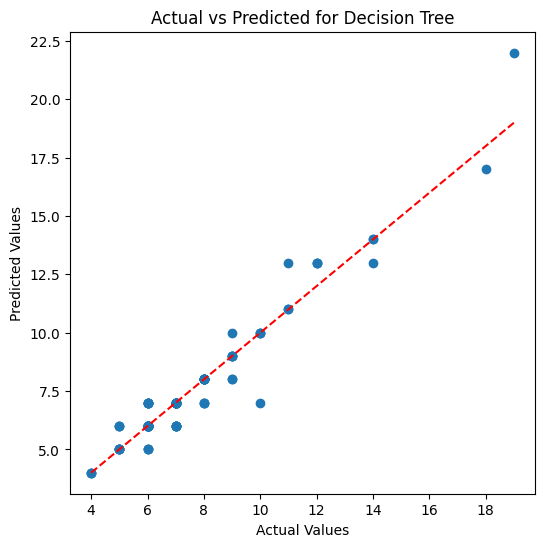

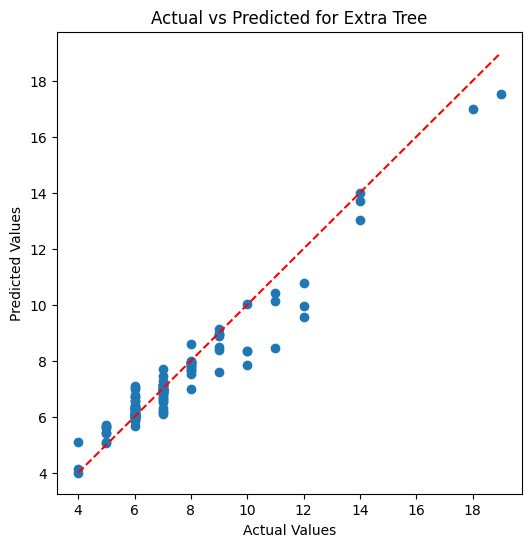

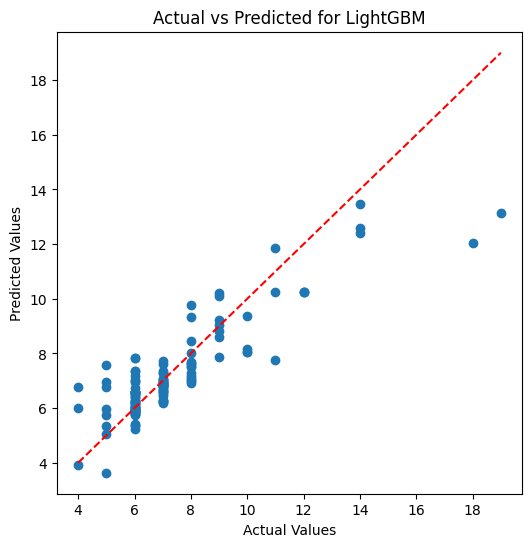

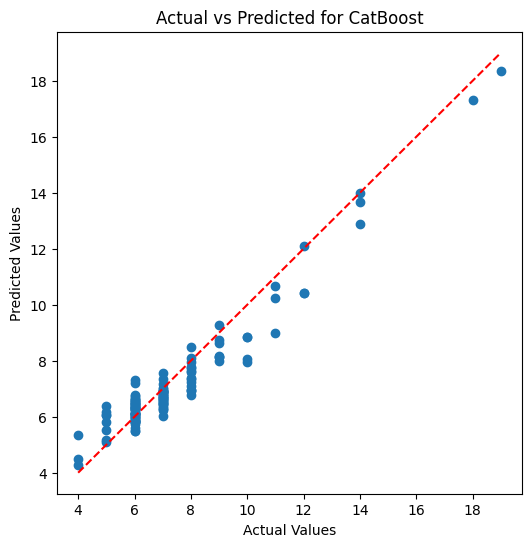

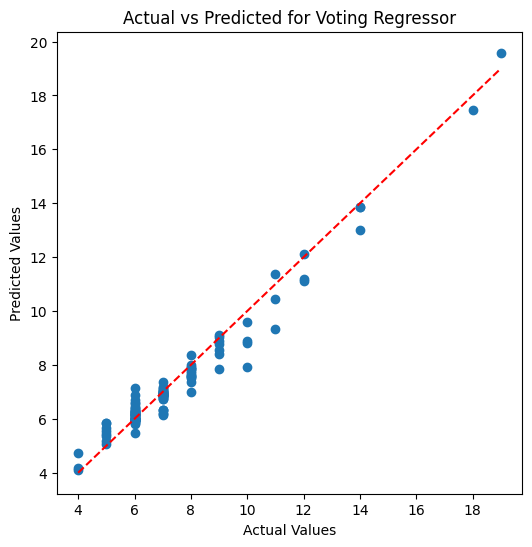

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test is your true labels and predictions are the predicted labels for each model
predictions = {
    'Decision Tree': dt_pred,
    'Extra Tree': et_pred,
    'LightGBM': lgb_pred,
    'CatBoost': catboost_pred,
    'Voting Regressor': voting_pred
}

# Loop through each model and its predictions to plot the scatter plot for Actual vs Predicted
for model_name, y_pred in predictions.items():
    plt.figure(figsize=(6, 6))  # Create a new figure for each model
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y = x line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()


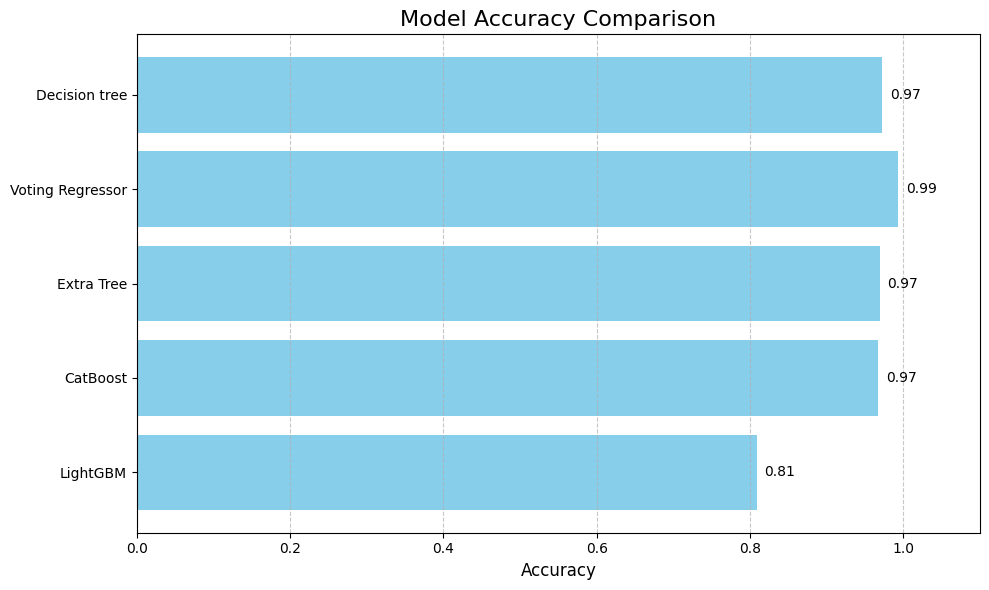

In [36]:
import matplotlib.pyplot as plt

# Assuming these are the model accuracies
models = ['LightGBM', 'CatBoost', 'Extra Tree', 'Voting Regressor', 'Decision tree']
accuracies = [lgb_r2, catboost_r2, et_r2, r2_voting, dt_r2]

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size
bars = plt.barh(models, accuracies, color='skyblue')  # Horizontal bar chart
plt.xlabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlim(0, 1.1)  # Assuming accuracies range between 0 and 1. Adjust if needed.
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding accuracy values to the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.01,  # Position slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically in the bar
        f'{bar.get_width():.2f}',  # Accuracy value formatted to 2 decimal places
        va='center',  # Vertical alignment
        fontsize=10
    )

plt.tight_layout()  # Adjust layout to fit labels
plt.show()
